# Project 1
## Finite difference simulation of 2D waves

### 1. The matematical problem

We are tasked with numerically solving the two-dimensional, standard, linear wave equation, with damping

$$\frac{\partial^2u}{\partial t^2} + b\frac{\partial u}{\partial t} = \frac{\partial}{\partial x}\left(q(x,y)\frac{\partial u}{\partial x}\right) + \frac{\partial}{\partial y}\left(q(x,y)\frac{\partial u}{\partial y}\right) + f(x,y,t),$$

in a rectangular spatial domain $$\Omega = [0,L_x]\times [0,L_y].$$ We use the homogenous Neumann condition

$$\frac{\partial u}{\partial n}= u = 0.$$


The initial conditions are 

$$u(x,y,0) = I(x,y)$$
$$\frac{\partial}{\partial t}u(x,y,0) = u_t(x,y,0) = V(x,y).$$





### 2. Discretization

We want to discretize the wave equation so that we can solve it numerically. To clarify some notation we will use $u(x_i,y_j,t_n) = u_{i,j}^n$, where $x_i  = i\Delta x$, $y_j  = j\Delta y$ and $t_n = n\Delta t$. We will use ghostpoints to solve the boundary problems, and so our indices range lie in the ranges $ i \in [1,...,N_x]$, $ j \in [1,...,N_y]$ and $ n \in [0,....,N_t]$. This means that we use ghostpoints $i=0, i= N_x+1$ and $j=0, j=N_y+1$. 

#### Left hand side
The discretization of the time domain is achieved by using both the forward and backwards taylor expansion on $u(x,y,t)$. This gives us

$$u_{i,j}^{n+1} = u_{i,j}^n + \Delta t* [u_t]_{i,j}^n + \frac{\Delta t^2}{2}[u_{tt}]_{i,j}^n + \mathcal{O}(\Delta t^3)$$
$$u_{i,j}^{n-1} = u_{i,j}^n - \Delta t* [u_t]_{i,j}^n + \frac{\Delta t^2}{2}[u_{tt}]_{i,j}^n + \mathcal{O}(\Delta t^3).$$

Adding the equations above gives us 

$$u_{i,j}^{n+1} + u_{i,j}^{n-1} = 2u_{i,j}^n + \Delta t[u_{tt}]_{i,j}^n, $$ 

which solved for $[u_{tt}]_{i,j}^n$ gives us a discretization of $\frac{\partial^2 u}{\partial t^2}$

$$ [u_tt]_{i,j}^n = \frac{u_{i,j}^{n+1} -2u_{i,j}^n + u_{i,j}^{n-1}}{\Delta t^2}.$$

Instead substracting them gives us

$$u_{i,j}^{n+1} - u_{i,j}^{n-1} = 2\Delta t[u_t]_{i,j}^n,$$ 

which solved for $[u_t]_{i,j}^n $ gives us a discretization of $\frac{\partial u}{\partial t}$

$$[u_t]_{i,j}^n =\frac{ u_{i,j}^{n+1} - u_{i,j}^{n-1}}{2\Delta t}. $$





#### Right hand side
Discretization of the spatial domain is achieved by defining
$$\phi \equiv q(x,y)u_x,$$
and $$ \phi_x \equiv \frac{\partial \phi}{\partial x}, $$
and to first discretize the outer derivative. We want to use the  centered difference scheme to discretize our derivatives. By taylor expansion this gives us 

$$\phi_{i+\frac{1}{2},j} = \phi_{i,j} + \frac{\Delta x}{2}[\phi_x]_{i,j}$$

$$\phi_{i-\frac{1}{2},j} = \phi_{i,j} - \frac{\Delta x}{2}[\phi_x]_{i,j}.$$

Substracting the equations above gives us 

$$[\phi_x]_{i,j} = \frac{\phi_{i+\frac{1}{2},j}-\phi_{i-\frac{1}{2},j}}{\Delta x}.$$

We then discretize $\phi_{i+\frac{1}{2},j}$ and $\phi_{i-\frac{1}{2},j}$

$$\phi_{i+\frac{1}{2},j} = q_{i+\frac{1}{2},j}[u_x]_{i+\frac{1}{2},j}=q_{i+\frac{1}{2},j}\frac{u_{i+1,j}-u_{i,j}}{\Delta x}, $$

$$\phi_{i-\frac{1}{2},j} = q_{i-\frac{1}{2},j}[u_x]_{i-\frac{1}{2},j} = q_{i-\frac{1}{2},j}\frac{u_{i,j}-u_{i-1,j}}{\Delta x},$$

and insert them in the expression for $[\phi_x]_{i,j}$to get

$$\phi_x = \left[ \frac{\partial}{\partial x}\left(q(x,y)\frac{\partial u}{\partial x}\right)\right]_{i,j}^n = \frac{1}{\Delta x^2}\left(q_{i + \frac{1}{2},j}(u_{i+1,j}^n - u_{i,j}^n) - q_{i - \frac{1}{2},j}(u_{i,j}^n - u_{i-1,j}^n)\right).$$

Now, using the arithmic mean approximation for $q_{i+\frac{1}{2},j}$ and $q_{i-\frac{1}{2},j}$ 

$$q_{i+\frac{1}{2},j} \approx \frac{1}{2}(q_{i,j}+q_{i+1,j}),$$

$$q_{i-\frac{1}{2},j} \approx \frac{1}{2}(q_{i,j}+q_{i-1,j}), $$

we get 

$$\phi_x  = \frac{1}{2\Delta x^2}\left((q_{i,j}+q_{i+1,j})(u_{i+1,j}^n - u_{i,j}^n) - (q_{i,j}+q_{i-1,j})(u_{i,j}^n - u_{i-1,j}^n)\right).$$


The exact same deduction applies to $\phi_y = \partial \phi / \partial y$, only doing the steps for the $j$ index. This gives us 

$$\phi_y = \left[ \frac{\partial}{\partial y}\left(q(x,y)\frac{\partial u}{\partial y}\right)\right]_{i,j}^n = \frac{1}{2\Delta y^2}\left((q_{i,j}+q_{i,j+1})(u_{i,j+1}^n - u_{i,j}^n) - (q_{i,j}+q_{i,j-1})(u_{i,j}^n - u_{i,j-1}^n)\right).$$

#### Complete discretization of general scheme
This gives us a complete discretization of the original equation

$$\frac{u_{i,j}^{n+1} -2u_{i,j}^n + u_{i,j}^{n-1}}{\Delta t^2} + b\frac{ u_{i,j}^{n+1} - u_{i,j}^{n-1}}{2\Delta t} =  \frac{1}{2\Delta x^2}\left((q_{i,j}+q_{i+1,j})(u_{i+1,j}^n - u_{i,j}^n) - (q_{i,j}+q_{i-1,j})(u_{i,j}^n - u_{i-1,j}^n)\right) + \frac{1}{2\Delta y^2}\left((q_{i,j}+q_{i,j+1})(u_{i,j+1}^n - u_{i,j}^n) - (q_{i,j}+q_{i,j-1})(u_{i,j}^n - u_{i,j-1}^n)\right) + f_{i,j}^n.$$

Defining some constants 

$$B \equiv \frac{b}{2\Delta t}, E \equiv \frac{1}{\Delta t^2},$$

and solving the equation above for $u_{i,j}^{n+1}$ gives us

$$u_{i,j}^{n+1} = \frac{1}{E+B}(\frac{1}{2\Delta x^2}((q_{i,j}+q_{i+1,j})(u_{i+1,j}^n - u_{i,j}^n) - (q_{i,j}+q_{i-1,j})(u_{i,j}^n - u_{i-1,j}^n)) + \frac{1}{2\Delta y^2}((q_{i,j}+q_{i,j+1})(u_{i,j+1}^n - u_{i,j}^n) - (q_{i,j}+q_{i,j-1})(u_{i,j}^n - u_{i,j-1}^n)) + 2Eu_{i,j}^n - (E-B)u_{i,j}^{n-1} + f_{i,j}^n).$$


#### Boundary conditions

Using the homogenous Neumann condition we get

$$ \frac{\partial u(x,y,t)}{\partial n} = \vec{n} \nabla u = 0.$$

We use a centered difference scheme to discretize for both directions

$$\frac{\partial u_{i,j}^n}{\partial x} = \frac{u_{i+1,j}^n - u_{i-1,j}^n}{2\Delta x},$$

$$\frac{\partial u_{i,j}^n}{\partial y} = \frac{u_{i,j+1}^n - u_{i,j-1}^n}{2\Delta y}.$$

At the boundary $i=1$ we then get 

$$u_{1,j}^n = \frac{u_{2,j}^n-u_{0,j}^n}{2\Delta x} = 0$$

$$ => u_{2,j}^n = u_{0,j}^n.$$ 

It is now trivial to see that we get

$$ u_{N_x+1,j}^n = u_{N_x-1,j}^n,\qquad \text{for }\textrm{ } i = N_x, $$

$$ u_{i,2}^n = u_{i,0}^n,\qquad \text{for }\textrm{ } j = 1, $$

$$ u_{i,N_y +1}^n = u_{i,N_y-1}^n,\qquad \text{for }\textrm{ } j = N_y . $$

This means that our ghost points take the same values as the ones on the edges of our interior spatial mesh.

#### Imposing boundary conditions on q

The function $q(x,y)$ does not follow the Neumann Condition, so we have to explicitly find the values of $q$ for the ghost points. 
Again we use both forward and backwards Taylor expansion as a means to achieve this.

$$q_{i+1,j} = q_{i,j} + (q_x)_{i,j}\Delta x + \mathcal{O(\Delta x)^2},$$
$$q_{i-1,j} = q_{i,j} - (q_x)_{i,j}\Delta x + \mathcal{O(\Delta x)^2}.$$

Adding the equations give us 

$$q_{i+1,j} + q_{i-1,j} = 2q_{i,j},$$

and the same goes for the $y$-coordinate

$$q_{i,j+1} + q_{i,j-1} = 2q_{i,j}.$$

With this we can now replace all the ghost points values of $q$ with values for $q$ inside the interior mesh

$$q_{0,j} = 2q_{1,j} - q_{2,j} \qquad q_{N_x+1,j}=2q_{N_x,j} -q_{N_x-1,j}$$

$$q_{i,0} = 2q_{i,1} - q_{i,2} \qquad q_{i,N_y+1}=2q_{i,N_y} - q_{i,N_y-1}$$


#### The modified scheme for the first step

From the initial conditions we get 

$$u_{i,j}^0 = I_{i,j},$$
$$[u_t]_{i,j}^0 = V_{i,j}.$$

Once again, using a centered diffenece scheme on $u_t$ we get

$$[u_t]_{i,j}^0 = \frac{u_{i,j}^1 - u_{i,j}^{-1}}{2\Delta t}= V_{i,j}$$

$$ => u_{i,j}^{-1} = u_{i,j}^1 - 2\Delta t V_{i,j},$$

which we can use to eliminate $u_{i,j}^{-1}$ from the equation solving the first step, $u_{i,j}^1$. This gives us 

$$u_{i,j}^{1} = \frac{1}{E+B}(\frac{1}{2\Delta x^2}((q_{i,j}+q_{i+1,j})(u_{i+1,j}^0 - u_{i,j}^0) - (q_{i,j}+q_{i-1,j})(u_{i,j}^0 - u_{i-1,j}^0)) + \frac{1}{2\Delta y^2}((q_{i,j}+q_{i,j+1})(u_{i,j+1}^0 - u_{i,j}^0) - (q_{i,j}+q_{i,j-1})(u_{i,j}^0 - u_{i,j-1}^0)) + 2Eu_{i,j}^0 - (E-B)(u_{i,j}^1 - 2\Delta t V_{i,j}) + f_{i,j}^0).$$

$$=>$$

$$u_{i,j}^{1} = u_{i,j}^0 + \frac{1}{2E}(\frac{1}{2\Delta x^2}((q_{i,j}+q_{i+1,j})(u_{i+1,j}^0 - u_{i,j}^0) - (q_{i,j}+q_{i-1,j})(u_{i,j}^0 - u_{i-1,j}^0)) + \frac{1}{2\Delta y^2}((q_{i,j}+q_{i,j+1})(u_{i,j+1}^0 - u_{i,j}^0) - (q_{i,j}+q_{i,j-1})(u_{i,j}^0 - u_{i,j-1}^0)) + 2\Delta tV_{i,j}(E-B) + f_{i,j}^0), $$

where 

$$B \equiv \frac{b}{2\Delta t}, E \equiv \frac{1}{\Delta t^2}.$$




### 3. Implementation of the general class solver


In [2]:
import numpy as np
import matplotlib.pyplot as plt


class Wave2D():
    def __init__(self, b, T, Lx, Ly, I, V, qq, Nx, Ny, f):
        """ Initializing class variables  """


        self.b = b
        self.Nx = Nx
        self.Lx = Lx
        self.Ly = Ly
        self.Ny = Ny
        self.x = np.linspace(0,self.Lx,self.Nx)
        self.y = np.linspace(0,self.Ly,self.Ny)
        self.dx = self.x[1] - self.x[0]
        self.dy = self.y[1] - self.y[0]

        # Making functions sent to init availible for all methods in class
        self.f = lambda x,y,t: f(x,y,t)
        self.I = lambda x,y: I(x,y)
        self.V = lambda x,y: V(x,y)
        self.qq = lambda x,y: qq(x,y)
        self.make_q()

        self.T = T
        self.Nt = int(round(self.T/self.dt))

        #Defining arrays to hold solutions
        self.u_new = np.zeros((self.Nx+2, self.Ny+2))
        self.u = np.zeros((self.Nx+2, self.Ny+2))
        self.u_old = np.zeros((self.Nx+2, self.Ny+2))

        #Variables for simplyfying the mathematical expressions
        self.dt2 = self.dt*self.dt
        self.E = 1./self.dt2
        self.B = self.b/(2*self.dt)
        self.Cy = 1./(2*self.dy*self.dy)
        self.Cx = 1./(2*self.dx*self.dx)


        # Variable for holding error norm
        self.linf_norm = 0

    def stability(self):
        """ Sets dt after stability criteria"""

        maximum_velocity = np.max(np.abs(self.q[1:self.Nx+1,1:self.Ny+1]))
        beta_factor = 0.9
        self.dt = beta_factor*(1./np.sqrt(maximum_velocity))*(1/np.sqrt(1/self.dx**2 + 1/self.dy**2))

    def set_initial_conditions(self):
        """ Setting initial values and solving first modified step """

        self.set_initial_u_old()
        self.first_step()

    def set_initial_u_old(self):
        """ Initializes the first u^(n-1) on the inner mesh points/boundary
        and calls a method to initialize ghost cells as well"""

        for i in range(1, self.Nx +1):
            for j in range(1, self.Ny +1):
                self.u_old[i,j] = self.I(self.x[i-1], self.y[j-1])

        self.updating_ghost_cells(self.u_old)

    def updating_ghost_cells(self,uu):
        """ Method for updating ghost cells """

        for i in range(1, self.Nx +1):
            uu[i,0] = uu[i,2]
            uu[i,self.Ny+1] = uu[i,self.Ny-1]

        for j in range(1, self.Ny +1):
            uu[0,j] = uu[2,j]
            uu[self.Nx+1,j] = uu[self.Nx-1,j]

    def make_q(self):
        """ Fills a matrix with values from the q(x,y) function """
        self.q = np.zeros((self.Nx+2,self.Ny+2))

        for i in range(1, self.Nx+1):
            for j in range(1, self.Ny+1):
                self.q[i,j] = self.qq(self.x[i-1], self.y[j-1])

        for i in range(1,self.Nx+1):
            self.q[i,0] = 2*self.q[i,1] - self.q[i,2]
            self.q[i,self.Ny +1] = 2*self.q[i,self.Ny] - self.q[i,self.Ny-1]


        for j in range(1,self.Ny+1):
            self.q[0,j] = 2*self.q[1,j] - self.q[2,j]
            self.q[self.Nx+1,j] = 2*self.q[self.Nx,j] - self.q[self.Nx-1,j]

        self.stability()

    def first_step(self):
        """ Calculates the first modified step and calls method
        to update ghost cells """

        q = self.q
        u_old = self.u_old

        for i in range(1, self.Nx+1):
            for j in range(1, self.Ny+1):

                self.u[i,j] = u_old[i,j] + (1/(2*self.E))*(self.Cx*((q[i,j] + q[i+1,j]) * (u_old[i+1,j] - u_old[i,j]) - (q[i,j] + q[i-1,j]) * (u_old[i,j] - u_old[i-1,j])) + self.Cy*((q[i,j] + q[i,j+1]) * (u_old[i,j+1] - u_old[i,j]) - (q[i,j] + q[i,j-1]) * (u_old[i,j] - u_old[i,j-1])) + 2*self.dt*self.V(self.x[i-1], self.y[j-1])*(self.E - self.B) + self.f(self.x[i-1], self.y[j-1],0))

        self.updating_ghost_cells(self.u)

    def advance_general_scheme(self):
        """ The general scheme for advancing the solution"""

        q = self.q
        u = self.u

        for i in range(1, self.Nx+1):
            for j in range(1, self.Ny+1):

                self.u_new[i,j] = (1/(self.E+self.B))*(self.Cx*((q[i,j] + q[i+1,j])*(u[i+1,j] - u[i,j]) - (q[i,j] + q[i-1,j]) * (u[i,j] - u[i-1,j])) + self.Cy*((q[i,j] + q[i,j+1]) * (u[i,j+1] - u[i,j]) - (q[i,j] + q[i,j-1]) * (u[i,j] - u[i,j-1])) + 2*self.E*u[i,j] - (self.E - self.B) * self.u_old[i,j] + self.f(self.x[i-1], self.y[j-1], self.t))

        self.updating_ghost_cells(self.u_new)

    def swap(self):
        """ Swaps u variables for each time step"""
        self.u_old, self.u, self.u_new = self.u, self.u_new, self.u_old

    def time_evolution(self):
        """ Method for progressing the time evolution of the solution.
            Also calls method to calculate true error from analytical solution"""

        self.t = self.dt
        while self.t <= self.T:
            self.advance_general_scheme()
            self.swap()
            self.t += self.dt

    def plot(self, X_ax, Y_ax , title):
        """ Plots final solution in the X,Y-plane """

        X,Y = np.meshgrid(self.x, self.y)
        plt.contourf(X,Y,self.u[1:self.Nx+1,1:self.Ny+1])
        plt.title(title)
        plt.xlabel(X_ax)
        plt.ylabel(Y_ax)
        plt.colorbar()
        plt.figure()
        



    def true_error(self,analytical):

        analytical_values = np.zeros([self.Nx,self.Ny])
        analytic = lambda x,y,t: analytical(x,y,t)

        for i in range(0,self.Nx):
            for j in range(0,self.Ny):
                analytical_values[i,j] = analytic(self.x[i],self.y[j],self.t)

        computed_error = analytical_values - self.u[1:self.Nx+1, 1:self.Ny+1]
        self.linf_norm = np.max(np.abs(computed_error))


### 4. Verification
#### Constant Solution

For a constant solution $u(x,y,t) = U$, the wave equation reduces to

$$ f(x,y,t) = 0. $$

From the initial conditions we get 

$$u(x,y,0) = I(x,y) = U,$$
$$u_t(x,y,0) = V(x,y) = 0.$$

For simplicity we use $q(x,y) = 1$. The only parameter left to fit is then $b$, which has to take the value $b=0$ since a constant solution can't have dampening. 

If we insert the constant solution $U$ along with $$f(x,y,t) = 0$$ into the discrete equation we get


$$U = \frac{1}{E+B}(\frac{1}{2\Delta x^2}((q_{i,j}+q_{i+1,j})(U - U) - (q_{i,j}+q_{i-1,j})(U-U)) + \frac{1}{2\Delta y^2}((q_{i,j}+q_{i,j+1})(U-U) - (q_{i,j}+q_{i,j-1})(U-U)) + E2U - (E-B)U)$$
$$=\frac{1}{E+B}(E2U - EU + BU) = U, $$

which shows that the constant solution is also an exact solution of the discrete equations. The cell below shows a test case for the constant solution case:

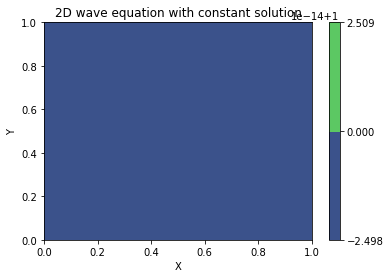

<Figure size 432x288 with 0 Axes>

In [10]:
    b = 0
    T = 1
    Nx = 10
    Ny = 10
    Lx = 1
    Ly = 1

    def I(x,y):
        return 1

    def V(x,y):
        return 0

    def q(x,y):
        return 1

    def f(x,y,t):
        return 0

    def analytical_solution(x,y,t):
        A = 1
        mx = 1
        my = 1
        w = 1

        kx = (mx*np.pi/Lx)
        ky = (my*np.pi/Ly)

        return A*np.cos(kx*x)*np.cos(ky*y)*np.cos(w*t)

    my_solver = Wave2D(b, T, Lx, Ly, I, V, q, Nx, Ny, f)
    my_solver.set_initial_conditions()
    my_solver.time_evolution()
    my_solver.plot("X", "Y", "2D wave equation with constant solution")
    plt.show()

### Consequences of wrongful implementation

In the cell below, a class `Wave2D_bugs`, which is the same class as `Wave2D`except for the implementation of some bugs in the implementations of the mathematical formulas. I have purposely changed some of the $i,j$ indices of both $q$ and $u$ as well as some of the constants in the equation.

In [32]:
ADD CLASS EITH BUGS

Below is a test of the class with bugs:

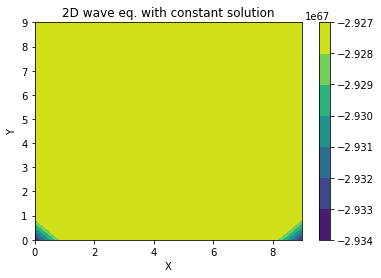

In [33]:

b = 0
dt = 0.01
T = 1
Nx = 10
Ny = 10
Lx = Nx -1
Ly = Ny -1

def I(x,y):
    return 1

def V(x,y):
    return 0

def q(x,y):
    return 1

def drivingforce(x,y,t):
    return 0

my_solver = Wave2D_bugs(b, dt, T, Lx, Ly, I, V, q, Nx, Ny, drivingforce)
my_solver.set_initial_conditions()
my_solver.time_evolution()
my_solver.plot("X", "Y", "2D wave eq. with constant solution")




As seen from the plot, the solution is no longer constant.

### 5. Standing, undampned waves

$\Delta t$ is defined by $\Delta x$ and $\Delta y$ in our class as

$$\Delta t = \beta\frac{1}{\sqrt{C^2(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2})}}.$$

As long as $\Delta x = \Delta y$, which we use in our code, one can see that $\Delta t \propto \Delta x$ and so $\Delta x$ can be interperated as the common discretization parameter $h$.

With a standing wave solution

$$u_e(x,y,t) = A\cos(k_xx)\cos(k_yy)\cos(\omega t),\qquad k_x = \frac{mx\pi}{L_x},\qquad k_y = \frac{m\pi}{L_y}, $$

we get initial conditions 

$$u_e(x,y,0) = I(x) = A\cos(k_xx)\cos(k_yy) ,$$
$$\frac{\partial}{\partial t}u_e(x,y,0) = V(x) = -\omega A\cos(k_xx)\cos(k_yy)sin(\omega *0) = 0 .$$

We know that the two-dimensional, standard, linear wave equation, without dampening and with a constant wave velocity $C$ can be expressed as

$$\frac{\partial^2u}{\partial t^2} = C^2\nabla^2u$$
An approptiate $\omega$ is found by solving this equation using the standing wave solution

$$\frac{\partial^2u}{\partial t^2} = -\omega^2 u_e,$$
$$\frac{\partial^2u}{\partial x^2} = -k_x^2 u_e,$$
$$\frac{\partial^2u}{\partial y^2} = -k_y^2 u_e,$$

which gives us 

$$\omega = C^2\sqrt{k_x^2 + k_y^2}$$

We choose to use the maximum error (the largest distance from the analytical expression) at the last timestep $N_t$ to calculate the error norm, which is to say we use the error norm 

$$E = ||e^{N_t}_{i,j}||_{l^\infty} = \underset{i}{\max} \underset{j}{\max}|e^{N_t}_{i,j}|., $$

We calculate the error norm using a set of $N_x=N_y$ values (as our $h$ is $\Delta x = \Delta y$ which are decided by $N_x = N_y$) and use these to compute a sequence of $r$ values by the relation

$$ r = \frac{\log(\frac{E_{i+1}}{E_i})}{\log(\frac{\Delta x_{i+1}}{\Delta x_i})}.$$



A test of the standing undampned wave is shown below, which plots both the analytical solution and the calculated $u$ for the last time step as well as prints the convergence rate r.

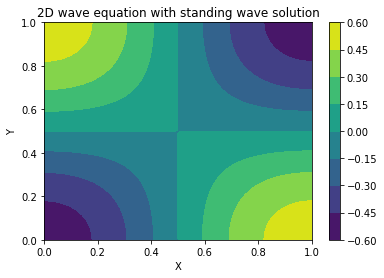

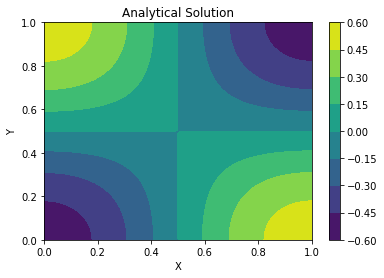

Convergence rate r: [2.864294200331723, 2.200213492936658, 1.9669160761097773, 2.036798952046302, 2.0186919288748695]


In [12]:
        b = 0
        T = 1
        Lx = 1
        Ly = 1

        A = 2
        mx = 1
        my = 1
        kx = (mx*np.pi/Lx)
        ky = (my*np.pi/Ly)
        w = np.sqrt((mx*np.pi/Lx)**2 + (my*np.pi/Ly)**2)*1   #As long as q =1 is constant

        def q(x,y):
            return 1

        def f(x,y,t):
            return 0

        def I(x,y):
            return A*np.cos(kx*x)*np.cos(ky*y)

        def V(x,y):
            return 0

        def analytical_solution(x,y,t):
            return A*np.cos(kx*x)*np.cos(ky*y)*np.cos(w*t)

        N = [2**i for i in range(1,7)]
        l_inf =[]
        delta_x = []

        for n in N:

            Nx = n
            Ny = n

            my_solver = Wave2D(b, T, Lx, Ly, I, V, q, Nx, Ny, f)
            my_solver.set_initial_conditions()
            my_solver.time_evolution()
            my_solver.true_error(analytical_solution)
            l_inf.append(my_solver.linf_norm)
            delta_x.append(my_solver.dx)

            if n == N[-1]:
                t = my_solver.t
                my_solver.plot("X", "Y", "2D wave equation with standing wave solution")
                x = my_solver.x
                y = my_solver.y
                X,Y = np.meshgrid(x,y)
                plt.contourf(X,Y, analytical_solution(X,Y,t))
                plt.title("Analytical Solution")
                plt.xlabel("X")
                plt.ylabel("Y")
                plt.colorbar()
                plt.show()


        r = []
        for i in range(len(l_inf)-1):
            r.append(np.log(l_inf[i+1]/l_inf[i])/np.log(delta_x[i+1]/delta_x[i]))

        print("Convergence rate r:",r)

### Waves with damping and variable wave velocity

We have a possible solution for the general 2D wave equation problem with damping and variable wave velocity

$$u_e(x,y,t) = (A\cos(\omega t) + B\sin(\omega t))e^{-dt}\cos(xk_x)\cos(yk_y), $$

and want to determine a suitable $f(x, y, t)$ along with some constants such that it in fact is a solution.
To simplify the mathematical calculations, we can with confidence put $B =0$ since the $\sin(\omega t)$ is just a factor contributing to the shift in phase. We choose a non constant $q(x,y) = q^x(x)q^y(y)$ where $q^x(x) = 1$ and $q^y(y) = y$ so that our $q(x,y) = y$. This can be intereprated as a wave moving in on a shore, where the wave velocity in the direction toward the shore (for us the $y$ direction) increases because of shallower water while the wave velocity along the shore (for us the $x$ direction) stays constant. To furter simplify the calculations we define $X \equiv cos(xk_x)$ and $Y \equiv cos(yk_y)$, since these have derivatives wich are easy to keep track of. This means that we now have

$$u_e(x,y,t) = A\cos(\omega t)e^{-dt}XY,$$

$$u_t = (-\omega A\sin(\omega t)e^{-dt} - de^{-dt}A\cos(\omega t))XY,$$

$$u_{tt} = AXYe^{-dt}((d^2-\omega^2)\cos(\omega t) + 2d\omega\sin(\omega t)),$$

$$u_x = A\cos(\omega t)e^{-dt}X_xY,$$

$$u_y = A\cos(\omega t)e^{-dt}XY_y.$$

We use the two latter to find $(q(x,y)u_x)_x$ and $(q(x,y)u_y)_y$:

$$(y*u_x)_x = yu_{xx} = A\cos(\omega t)e^{-dt}X_{xx}Y = -k_x^2yA\cos(\omega t)e^{-dt}XY,$$

$$(y*u_y)_y = u_y + yu_{yy} = -k_yA\cos(\omega t)e^{-dt}Xsin(yk_y) -k_y^2yA\cos(\omega t)e^{-dt}XY.$$

We can now insert these into general 2D wave equation problem

$$AXYe^{-dt}((d^2-\omega^2)\cos(\omega t) + 2d\omega\sin(\omega t)) +b(-\omega A\sin(\omega t)e^{-dt} - de^{-dt}A\cos(\omega t))XY =  $$
$$ -k_x^2yA\cos(\omega t)e^{-dt}XY -k_yA\cos(\omega t)e^{-dt}Xsin(yk_y) -k_y^2yA\cos(\omega t)e^{-dt}XY + f.$$

Solving for f gives us

$$f = AXYe^{-dt}\cos(\omega t)\left[ d^2 - \omega^2 + \omega(2d -b)\tan(\omega t) -db + yk_x^2 + k_y\tan(yk_y)+yk_y^2 \right]= $$
$$ u_e\left[ d^2 - \omega^2 + \omega(2d -b)\tan(\omega t) -db + yk_x^2 + k_y\tan(yk_y)+yk_y^2 \right]. $$



We define $K^2 \equiv k_x^2 + k_y^2$ and choose $b = 2d$ which gives us 

$$f = u_e\left[ yK^2 + k_y\tan(yk_y) -d^2 -\omega^2  \right], $$

and by also choosing $\omega = d$ we can further simplify the expression as

$$f = u_e\left[ yK^2 + k_y\tan(yk_y) -2\omega^2  \right].$$

Keeping in mind that we have choosen $b = 2d$ and $\omega =d$ we find $I(x,y)$ and $V(x,y)$ by using the initial conditions

$$u(x,y,0)= I(x,y) = A\cos(\omega*0)e^{-\omega *0}\cos(xk_x)\cos(yk_y) = A\cos(xk_x)\cos(yk_y),$$

$$u_t(x,y,0) = V(x,y) = (-\omega A\cos(\omega *0)e^{-\omega *0}-\omega A\sin(\omega *0)e^{-\omega *0})\cos(xk_x)\cos(yk_y)=-\omega A\cos(xk_x)\cos(yk_y). $$


In total we now have the following expressions to solve using our solver class

$$u_e(x,y,t) =  A\cos(\omega t)e^{-dt}\cos(xk_x)\cos(yk_y),$$

$$f(x,y,t) = u_e\left[ yK^2 + k_y\tan(yk_y) -2\omega^2  \right],$$

$$ I(x,y) = A\cos(xk_x)\cos(yk_y), $$

$$ V(x,y) =  -\omega A\cos(xk_x)\cos(yk_y). $$

A test of the implemented wave with dampening and variable wave velocity is shown below.


In [ ]:

    A = 1
    w = 1
    b = 2*w

    T = 1
    Lx = 1
    Ly = 1

    mx = 1
    my = 1
    kx = (mx*np.pi/Lx)
    ky = (my*np.pi/Ly)
    K2 = kx**2 + ky**2

    def q(x,y):
        return y

    def analytical_solution(x,y,t):
        return A*np.cos(w*t)*np.exp(-w*t)*np.cos(kx*x)*np.cos(ky*y)

    def I(x,y):
        return A*np.cos(kx*x)*np.cos(ky*y)

    def V(x,y):
        return -w*A*np.cos(kx*x)*np.cos(ky*y)

    def f(x,y,t):
        return A*np.cos(w*t)*np.exp(-w*t)*np.cos(kx*x)*np.cos(ky*y)*(K2*y + ky*np.tan(y*ky)-2*w*w)

    N = [2**i for i in range(1,7)]
    l_inf =[]
    delta_x = []

    for n in N:

        Nx = n
        Ny = n

        my_solver = Wave2D(b, T, Lx, Ly, I, V, q, Nx, Ny, f)
        my_solver.set_initial_conditions()
        my_solver.time_evolution()
        my_solver.true_error(analytical_solution)
        l_inf.append(my_solver.linf_norm)
        delta_x.append(my_solver.dx)


        if n == N[-1]:
            t = my_solver.t
            x = my_solver.x
            y = my_solver.y
            X,Y = np.meshgrid(x,y)
            my_solver.plot("X", "Y", "2D wave with damping and variable wave velocity")
            plt.contourf(X,Y, analytical_solution(X,Y,t))
            plt.title("Analytical Solution")
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.colorbar()
            plt.show()

    r = []
    for i in range(len(l_inf)-1):
        r.append(np.log(l_inf[i+1]/l_inf[i])/np.log(delta_x[i+1]/delta_x[i]))

    print("Convergence rate r:",r)
